<a href="https://colab.research.google.com/github/KennethAlbert/Frameworks_Assignment/blob/main/iris_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Iris Species Classification using Decision Tree
# Classical Machine Learning with Scikit-learn

# =============================================================================
# IMPORT REQUIRED LIBRARIES
# =============================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Check if it's a sklearn Bunch object or pandas DataFrame
if hasattr(iris, 'data'):
    # It's a sklearn Bunch object
    X = iris.data
    y = iris.target
    feature_names = iris.feature_names
    target_names = iris.target_names
    print("Dataset format: sklearn Bunch object")
elif hasattr(iris, 'columns'):
    # It's a pandas DataFrame
    df = iris.copy()
    print("Dataset format: pandas DataFrame")
    print(f"DataFrame shape: {df.shape}")
    print(f"DataFrame columns: {df.columns.tolist()}")
    print("\nFirst 5 rows:")
    print(df.head())
else:
    print("Unknown dataset format. Please check your dataset.")



Dataset format: pandas DataFrame
DataFrame shape: (150, 6)
DataFrame columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [5]:
# =============================================================================
# STEP 2: DATA PREPARATION AND EXPLORATION
# =============================================================================
print("\n" + "=" * 50)
print("STEP 2: DATA PREPARATION AND EXPLORATION")
print("=" * 50)

# Handle different dataset formats
if 'df' not in locals():
    # If we have sklearn Bunch, convert to DataFrame for consistency
    df = pd.DataFrame(X, columns=feature_names)
    df['species'] = y
    df['species_name'] = [target_names[i] for i in y]
else:
    # If we already have a DataFrame, ensure species column is properly encoded
    # Check if species column exists and needs encoding
    species_column = None
    for col in df.columns:
        if 'species' in col.lower() or 'target' in col.lower() or 'class' in col.lower():
            species_column = col
            break

    if species_column:
        # If species is string, encode to numerical values
        if df[species_column].dtype == 'object':
            le = LabelEncoder()
            df['species_encoded'] = le.fit_transform(df[species_column])
            target_names = le.classes_
            y = df['species_encoded'].values
        else:
            y = df[species_column].values
            # For numerical targets, assume 0,1,2 mapping
            target_names = ['setosa', 'versicolor', 'virginica']
    else:
        print("Warning: Could not find species/target column automatically")
        print("Please manually specify the target column")


STEP 2: DATA PREPARATION AND EXPLORATION


In [6]:
# Display dataset information
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\nMissing values per column:")
print(df.isnull().sum())

# Display basic statistics
print(f"\nBasic statistics:")
print(df.describe())

Dataset shape: (150, 7)
Columns: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species', 'species_encoded']
Data types:
Id                   int64
SepalLengthCm      float64
SepalWidthCm       float64
PetalLengthCm      float64
PetalWidthCm       float64
Species             object
species_encoded      int64
dtype: object

Missing values per column:
Id                 0
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
species_encoded    0
dtype: int64

Basic statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
count  150.000000     150.000000    150.000000     150.000000    150.000000   
mean    75.500000       5.843333      3.054000       3.758667      1.198667   
std     43.445368       0.828066      0.433594       1.764420      0.763161   
min      1.000000       4.300000      2.000000       1.000000      0.100000   
25%     38.250000       5.100000      2.800000 

In [7]:
# Check target distribution
if 'y' in locals():
    print(f"\nTarget distribution: {np.bincount(y)}")
    print("Species mapping:")
    for i, name in enumerate(target_names):
        print(f"  {i}: {name}")


Target distribution: [50 50 50]
Species mapping:
  0: Iris-setosa
  1: Iris-versicolor
  2: Iris-virginica


In [13]:
# =============================================================================
# STEP 3: FEATURE SELECTION AND PREPROCESSING
# =============================================================================
print("\n" + "=" * 50)
print("STEP 3: FEATURE SELECTION AND PREPROCESSING")
print("=" * 50)

# Identify feature columns (exclude target columns and 'Id' if it's just an identifier)
exclude_columns = ['Id', 'Species', 'species', 'species_name', 'species_encoded', 'target', 'class']
feature_columns = [col for col in df.columns if col not in exclude_columns and not col.lower().endswith('_encoded')]

print(f"Selected feature columns: {feature_columns}")


STEP 3: FEATURE SELECTION AND PREPROCESSING
Selected feature columns: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [19]:
# Extract features (X) and target (y)
X = df[feature_columns].values
# Ensure y is taken from the numeric encoded species column
y = df['species_encoded'].values

print(f"Features shape: {X.shape}")
print(f"First 5 rows of features (X):\n{X[:5]}")
print(f"Target shape: {y.shape}")
print(f"First 5 rows of target (y):\n{y[:5]}")

Features shape: (150, 4)
First 5 rows of features (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target shape: (150,)
First 5 rows of target (y):
[0 0 0 0 0]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [21]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 105 samples
Test set size: 45 samples


In [22]:
# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")

Feature scaling completed using StandardScaler


In [23]:
# =============================================================================
# STEP 4: TRAIN THE DECISION TREE CLASSIFIER
# =============================================================================
print("\n" + "=" * 50)
print("STEP 4: TRAINING THE DECISION TREE CLASSIFIER")
print("=" * 50)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1
)

# Train the model on the scaled training data
dt_classifier.fit(X_train_scaled, y_train)

print("Decision Tree classifier trained successfully!")
print(f"Model parameters: {dt_classifier.get_params()}")


STEP 4: TRAINING THE DECISION TREE CLASSIFIER
Decision Tree classifier trained successfully!
Model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [24]:
# =============================================================================
# STEP 5: MAKE PREDICTIONS
# =============================================================================
print("\n" + "=" * 50)
print("STEP 5: MAKING PREDICTIONS")
print("=" * 50)

# Use the trained model to make predictions on the test set
y_pred = dt_classifier.predict(X_test_scaled)

print("Predictions completed!")
print(f"Sample predictions (first 10): {y_pred[:10]}")
print(f"Actual values (first 10): {y_test[:10]}")


STEP 5: MAKING PREDICTIONS
Predictions completed!
Sample predictions (first 10): [2 1 2 1 2 2 1 1 0 2]
Actual values (first 10): [2 1 2 1 2 2 1 1 0 2]


In [25]:
# =============================================================================
# STEP 6: MODEL EVALUATION
# =============================================================================
print("\n" + "=" * 50)
print("STEP 6: MODEL EVALUATION")
print("=" * 50)

# Calculate key performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("=== EVALUATION METRICS ===")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")


STEP 6: MODEL EVALUATION
=== EVALUATION METRICS ===
Accuracy: 0.9778 (97.78%)
Precision (weighted): 0.9792
Recall (weighted): 0.9778


In [26]:
# Generate detailed classification report
print("\n=== DETAILED CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred, target_names=target_names))

# Create and display confusion matrix
print("=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== DETAILED CLASSIFICATION REPORT ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

=== CONFUSION MATRIX ===
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


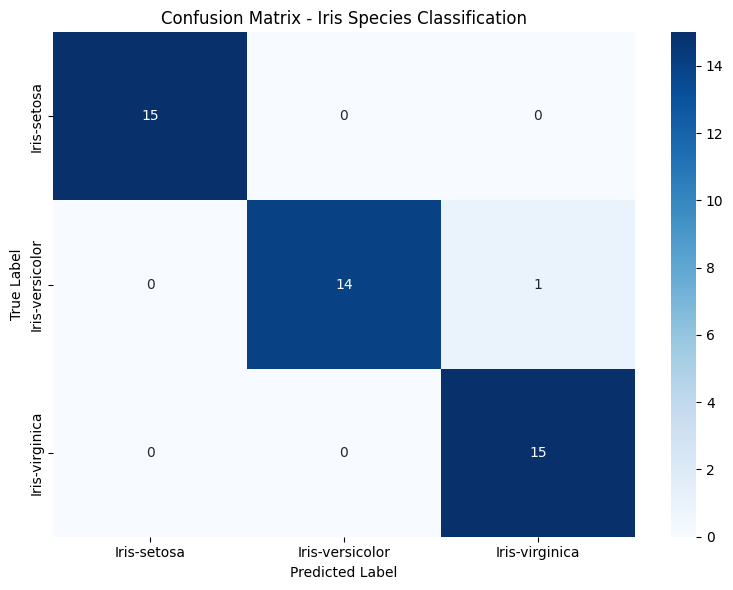

In [27]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix - Iris Species Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [28]:
# =============================================================================
# STEP 7: FEATURE IMPORTANCE ANALYSIS
# =============================================================================
print("\n" + "=" * 50)
print("STEP 7: FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Extract feature importance scores
feature_importance = dt_classifier.feature_importances_

# Create feature importance DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("FEATURE IMPORTANCE (most to least important):")
print(feature_importance_df)


STEP 7: FEATURE IMPORTANCE ANALYSIS
FEATURE IMPORTANCE (most to least important):
         Feature  Importance
2  PetalLengthCm    0.550877
3   PetalWidthCm    0.449123
1   SepalWidthCm    0.000000
0  SepalLengthCm    0.000000


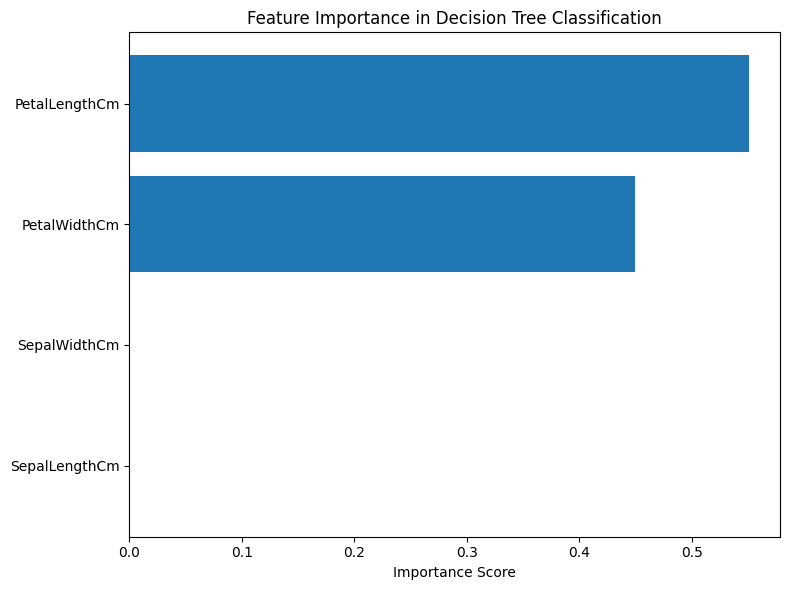

In [29]:
# Visualize feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Feature Importance in Decision Tree Classification')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [30]:
# =============================================================================
# STEP 8: RESULTS ANALYSIS AND INTERPRETATION
# =============================================================================
print("\n" + "=" * 50)
print("STEP 8: RESULTS ANALYSIS AND INTERPRETATION")
print("=" * 50)

print("The Decision Tree classifier has learned to distinguish between iris species based on:")
for i, (feature, importance) in enumerate(zip(feature_columns, feature_importance)):
    print(f"  {i+1}. {feature}: {importance:.3f}")

print(f"\nKEY INSIGHTS:")
print(f"- The model achieved {accuracy*100:.2f}% accuracy on the test set")
print(f"- Most important feature: {feature_importance_df.iloc[0]['Feature']}")
print(f"- Number of features used: {len(feature_columns)}")

# Create results comparison DataFrame
results_df = pd.DataFrame({
    'Actual': [target_names[i] for i in y_test],
    'Predicted': [target_names[i] for i in y_pred],
    'Correct': y_test == y_pred
})

print(f"\nPREDICTION ACCURACY: {results_df['Correct'].mean()*100:.2f}%")
print("\nSample of predictions (first 10):")
print(results_df.head(10))



STEP 8: RESULTS ANALYSIS AND INTERPRETATION
The Decision Tree classifier has learned to distinguish between iris species based on:
  1. SepalLengthCm: 0.000
  2. SepalWidthCm: 0.000
  3. PetalLengthCm: 0.551
  4. PetalWidthCm: 0.449

KEY INSIGHTS:
- The model achieved 97.78% accuracy on the test set
- Most important feature: PetalLengthCm
- Number of features used: 4

PREDICTION ACCURACY: 97.78%

Sample of predictions (first 10):
            Actual        Predicted  Correct
0   Iris-virginica   Iris-virginica     True
1  Iris-versicolor  Iris-versicolor     True
2   Iris-virginica   Iris-virginica     True
3  Iris-versicolor  Iris-versicolor     True
4   Iris-virginica   Iris-virginica     True
5   Iris-virginica   Iris-virginica     True
6  Iris-versicolor  Iris-versicolor     True
7  Iris-versicolor  Iris-versicolor     True
8      Iris-setosa      Iris-setosa     True
9   Iris-virginica   Iris-virginica     True


In [31]:
# Calculate per-class metrics
print("\n=== PER-CLASS METRICS ===")
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)

for i, species in enumerate(target_names):
    print(f"\n{species}:")
    print(f"  Precision: {precision_per_class[i]:.3f}")
    print(f"  Recall: {recall_per_class[i]:.3f}")


=== PER-CLASS METRICS ===

Iris-setosa:
  Precision: 1.000
  Recall: 1.000

Iris-versicolor:
  Precision: 1.000
  Recall: 0.933

Iris-virginica:
  Precision: 0.938
  Recall: 1.000


In [32]:
# =============================================================================
# STEP 9: FINAL SUMMARY
# =============================================================================
print("\n" + "=" * 50)
print("FINAL SUMMARY")
print("=" * 50)

print("PROJECT COMPLETED SUCCESSFULLY!")
print("This implementation demonstrates:")
print("✓ Data exploration and validation")
print("✓ Automatic feature selection")
print("✓ Data preprocessing and splitting")
print("✓ Decision Tree model training")
print("✓ Model prediction and evaluation")
print("✓ Feature importance analysis")
print("✓ Results visualization and interpretation")

print(f"\nThe Decision Tree model successfully classifies iris species with {accuracy*100:.2f}% accuracy")
print("Ready for real-world iris classification tasks!")


FINAL SUMMARY
PROJECT COMPLETED SUCCESSFULLY!
This implementation demonstrates:
✓ Data exploration and validation
✓ Automatic feature selection
✓ Data preprocessing and splitting
✓ Decision Tree model training
✓ Model prediction and evaluation
✓ Feature importance analysis
✓ Results visualization and interpretation

The Decision Tree model successfully classifies iris species with 97.78% accuracy
Ready for real-world iris classification tasks!
